In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import json
import re
from datetime import datetime, timedelta

In [21]:
obsdf = pd.read_csv('r4/combined_observations.csv')
obsdf.head()

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex
0,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00
1,100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00
2,200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00
3,300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01
4,400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01


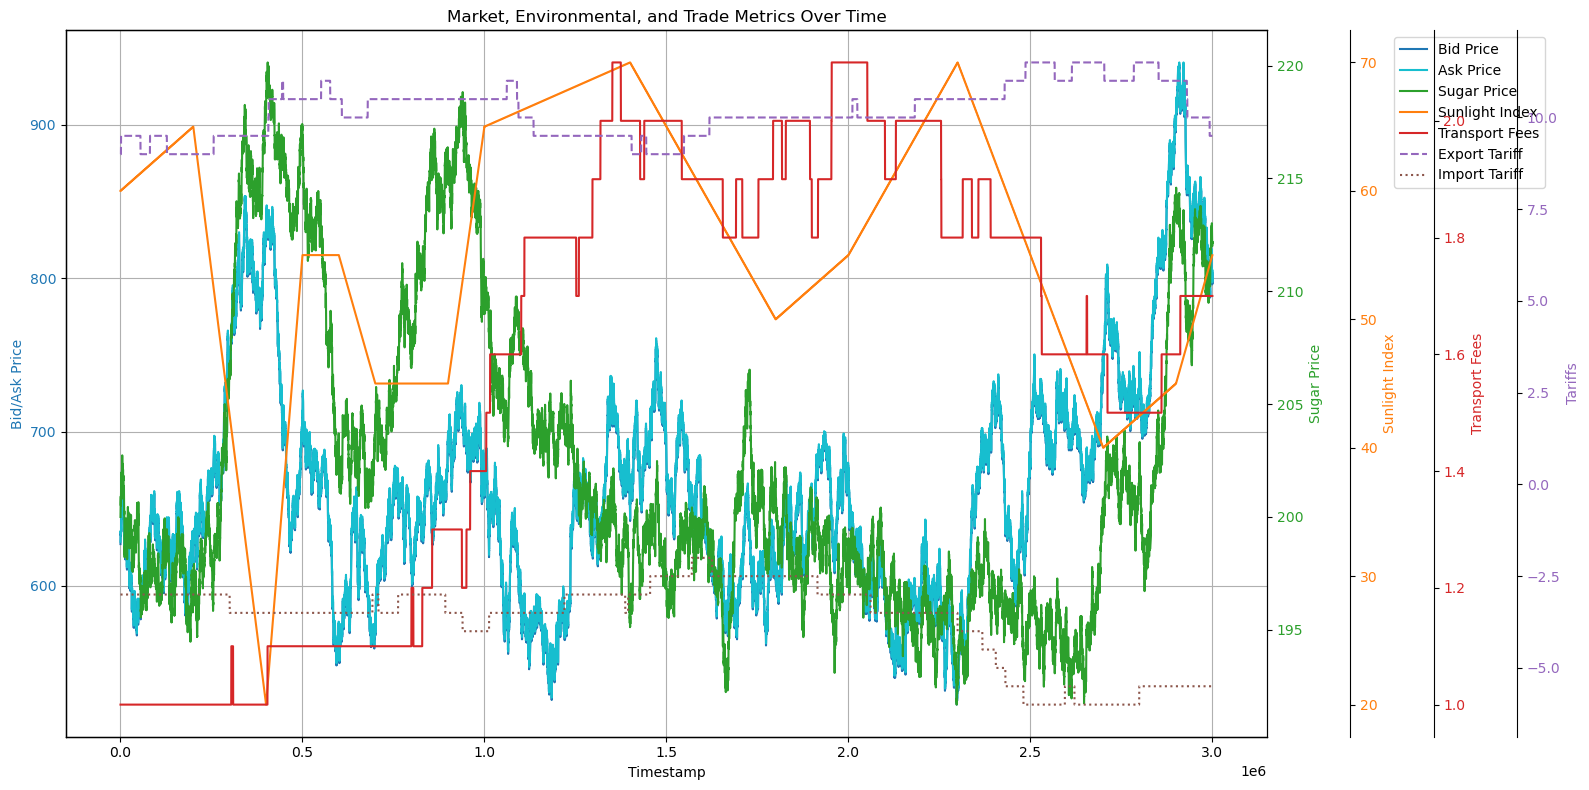

In [22]:
fig, ax1 = plt.subplots(figsize=(16, 8))  # Slightly larger figure to accommodate more axes
#graph observations
# First axis - Bid/Ask Prices
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Bid/Ask Price', color='tab:blue')
ax1.plot(obsdf['timestamp'], obsdf['bidPrice'], label='Bid Price', color='tab:blue')
ax1.plot(obsdf['timestamp'], obsdf['askPrice'], label='Ask Price', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Second y-axis - Sugar Price
ax2 = ax1.twinx()
ax2.set_ylabel('Sugar Price', color='tab:green')
ax2.plot(obsdf['timestamp'], obsdf['sugarPrice'], label='Sugar Price', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Third y-axis - Sunlight Index
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))
ax3.set_ylabel('Sunlight Index', color='tab:orange')
ax3.plot(obsdf['timestamp'], obsdf['sunlightIndex'], label='Sunlight Index', color='tab:orange')
ax3.tick_params(axis='y', labelcolor='tab:orange')

# Fourth y-axis - Transport Fees
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("outward", 120))
ax4.set_ylabel('Transport Fees', color='tab:red')
ax4.plot(obsdf['timestamp'], obsdf['transportFees'], label='Transport Fees', color='tab:red')
ax4.tick_params(axis='y', labelcolor='tab:red')

# Fifth y-axis - Tariffs (Export and Import)
ax5 = ax1.twinx()
ax5.spines["right"].set_position(("outward", 180))
ax5.set_ylabel('Tariffs', color='tab:purple')
ax5.plot(obsdf['timestamp'], obsdf['exportTariff'], label='Export Tariff', color='tab:purple', linestyle='--')
ax5.plot(obsdf['timestamp'], obsdf['importTariff'], label='Import Tariff', color='tab:brown', linestyle=':')
ax5.tick_params(axis='y', labelcolor='tab:purple')

# Title & Grid
plt.title('Market, Environmental, and Trade Metrics Over Time')
ax1.grid(True)

# Legend - Combine all lines from all axes
lines, labels = [], []
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax_lines, ax_labels = ax.get_legend_handles_labels()
    lines += ax_lines
    labels += ax_labels
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.1, 1))  # Move legend outside

plt.tight_layout()
plt.show()

In [15]:
#Combine 3 into one
df1 = pd.read_csv('r4/r4data/trades_round_4_day_1.csv', delimiter=';')
df2 = pd.read_csv('r4/r4data/trades_round_4_day_2.csv', delimiter=';')
df3 = pd.read_csv('r4/r4data/trades_round_4_day_3.csv', delimiter=';')

# Offset timestamps
df2['timestamp'] += 1_000_000
df3['timestamp'] += 2_000_000

# Combine them
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save to new file
combined_df.to_csv('r4/combined_trades.csv', index=False)


In [16]:
#only get macrons
macaron_df = combined_df[combined_df['symbol'] == 'MAGNIFICENT_MACARONS']
combined_df.to_csv('r4/magnificent_macarons_trades.csv', index=False)


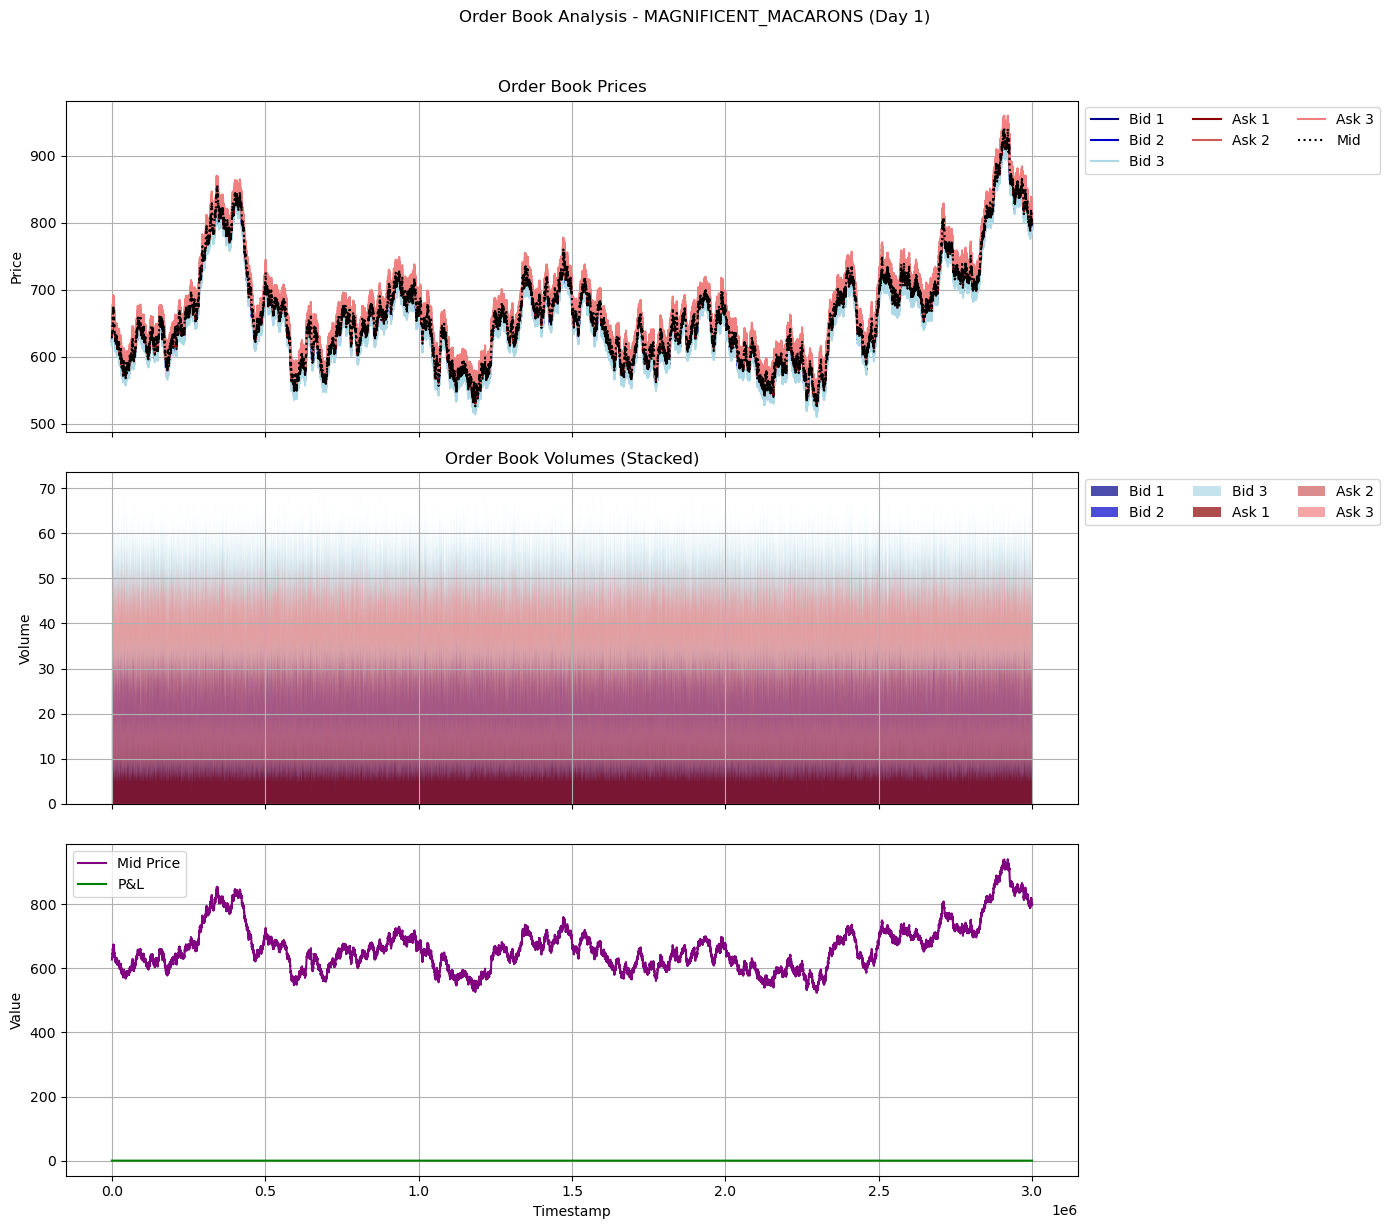

In [2]:

df = pd.read_csv('r4/magnificent_macarons_prices.csv')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# 1. Price Levels
ax1.set_title('Order Book Prices')
ax1.plot(df['timestamp'], df['bid_price_1'], label='Bid 1', color='darkblue')
ax1.plot(df['timestamp'], df['bid_price_2'], label='Bid 2', color='mediumblue')
ax1.plot(df['timestamp'], df['bid_price_3'], label='Bid 3', color='lightblue')
ax1.plot(df['timestamp'], df['ask_price_1'], label='Ask 1', color='darkred')
ax1.plot(df['timestamp'], df['ask_price_2'], label='Ask 2', color='indianred')
ax1.plot(df['timestamp'], df['ask_price_3'], label='Ask 3', color='lightcoral')
ax1.plot(df['timestamp'], df['mid_price'], label='Mid', color='black', linestyle=':')
ax1.set_ylabel('Price')
ax1.legend(ncol=3, bbox_to_anchor=(1, 1))
ax1.grid(True)


# 2. Volume Levels (as stacked area)
ax2.set_title('Order Book Volumes (Stacked)')
ax2.stackplot(df['timestamp'], 
             df['bid_volume_1'], df['bid_volume_2'], df['bid_volume_3'],
             labels=['Bid 1', 'Bid 2', 'Bid 3'],
             colors=['darkblue', 'mediumblue', 'lightblue'],
             alpha=0.7)
ax2.stackplot(df['timestamp'], 
             df['ask_volume_1'], df['ask_volume_2'], df['ask_volume_3'],
             labels=['Ask 1', 'Ask 2', 'Ask 3'],
             colors=['darkred', 'indianred', 'lightcoral'],
             alpha=0.7)
ax2.set_ylabel('Volume')
ax2.legend(ncol=3, bbox_to_anchor=(1, 1))
ax2.grid(True)

# 3. Mid Price and P&L
ax3.plot(df['timestamp'], df['mid_price'], label='Mid Price', color='purple')
ax3.plot(df['timestamp'], df['profit_and_loss'], label='P&L', color='green')
ax3.set_xlabel('Timestamp')
ax3.set_ylabel('Value')
ax3.legend()
ax3.grid(True)

plt.suptitle(f'Order Book Analysis - {df["product"].iloc[0]} (Day {df["day"].iloc[0]})', y=1.02)
plt.tight_layout()
plt.show()

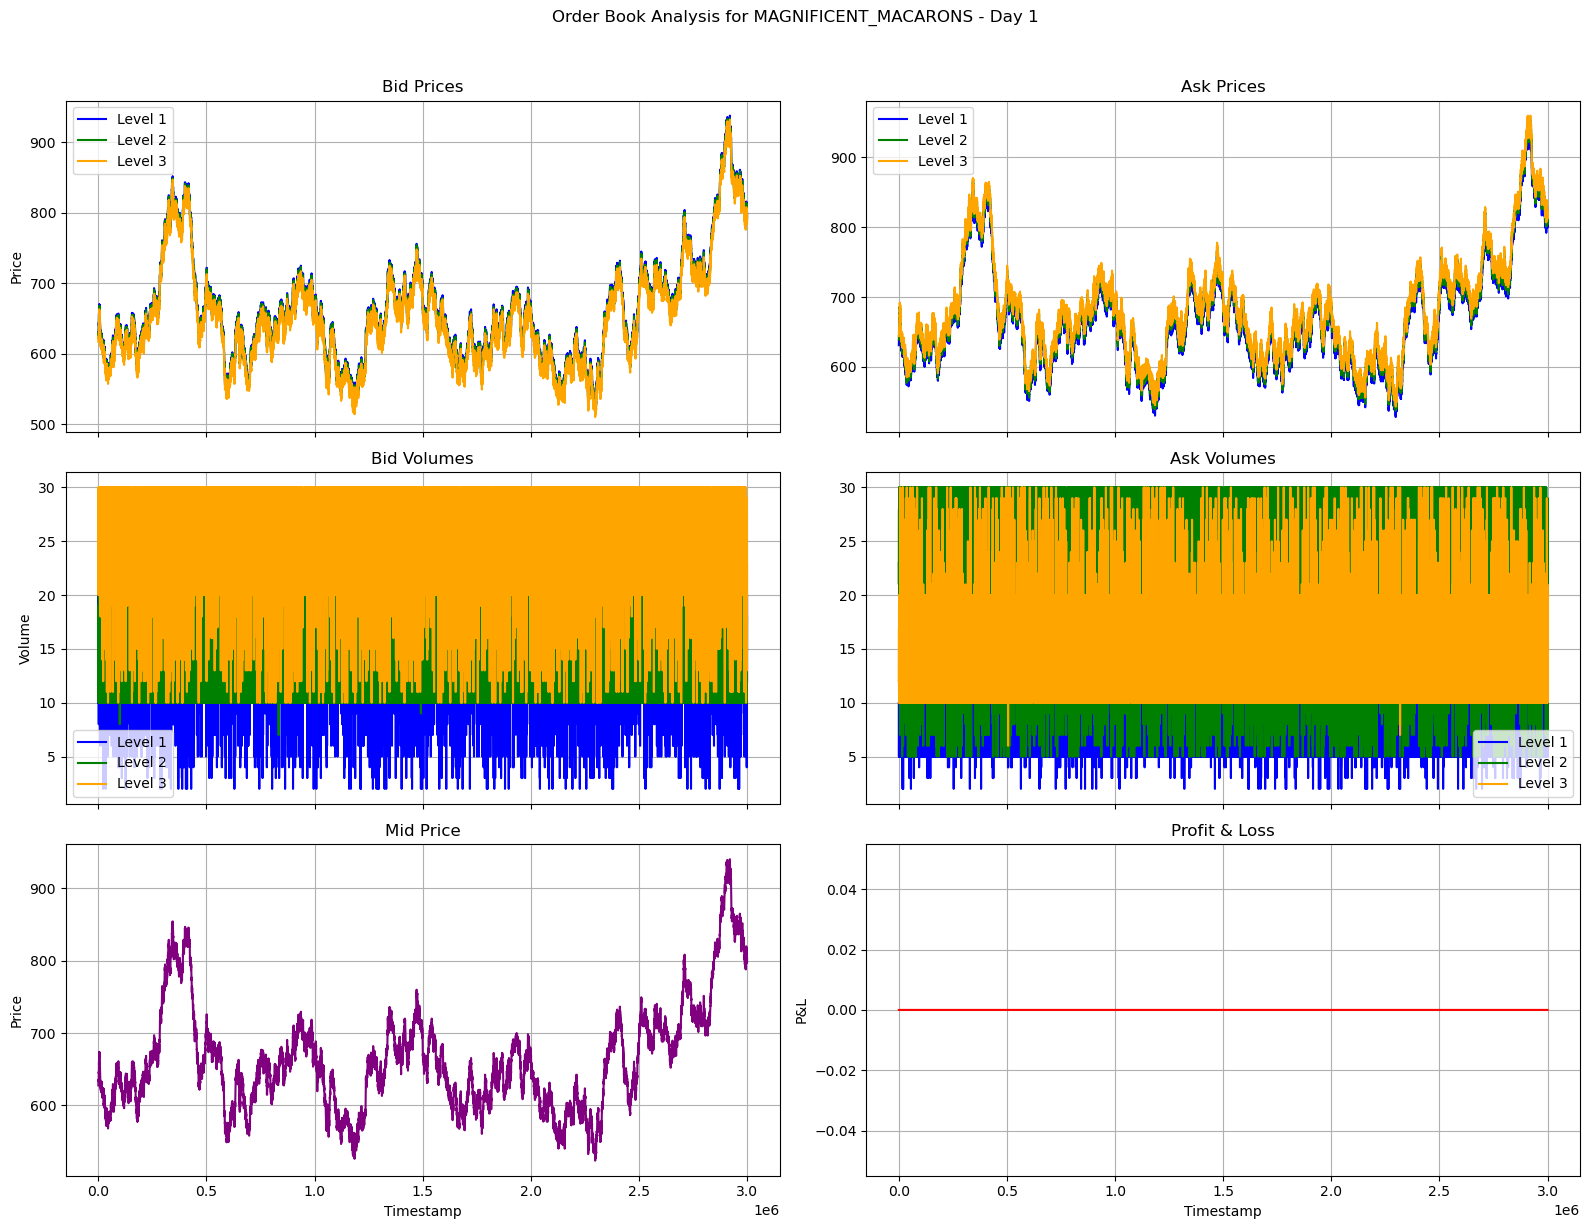

In [25]:

fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True)
plt.suptitle(f'Order Book Analysis for {df["product"].iloc[0]} - Day {df["day"].iloc[0]}', y=1.02)

# Price Levels
axes[0,0].set_title('Bid Prices')
axes[0,0].plot(df['timestamp'], df['bid_price_1'], label='Level 1', color='blue')
axes[0,0].plot(df['timestamp'], df['bid_price_2'], label='Level 2', color='green')
axes[0,0].plot(df['timestamp'], df['bid_price_3'], label='Level 3', color='orange')
axes[0,0].set_ylabel('Price')
axes[0,0].legend()
axes[0,0].grid(True)

axes[0,1].set_title('Ask Prices')
axes[0,1].plot(df['timestamp'], df['ask_price_1'], label='Level 1', color='blue')
axes[0,1].plot(df['timestamp'], df['ask_price_2'], label='Level 2', color='green')
axes[0,1].plot(df['timestamp'], df['ask_price_3'], label='Level 3', color='orange')
axes[0,1].legend()
axes[0,1].grid(True)

# Volume Levels
axes[1,0].set_title('Bid Volumes')
axes[1,0].plot(df['timestamp'], df['bid_volume_1'], label='Level 1', color='blue')
axes[1,0].plot(df['timestamp'], df['bid_volume_2'], label='Level 2', color='green')
axes[1,0].plot(df['timestamp'], df['bid_volume_3'], label='Level 3', color='orange')
axes[1,0].set_ylabel('Volume')
axes[1,0].legend()
axes[1,0].grid(True)

axes[1,1].set_title('Ask Volumes')
axes[1,1].plot(df['timestamp'], df['ask_volume_1'], label='Level 1', color='blue')
axes[1,1].plot(df['timestamp'], df['ask_volume_2'], label='Level 2', color='green')
axes[1,1].plot(df['timestamp'], df['ask_volume_3'], label='Level 3', color='orange')
axes[1,1].legend()
axes[1,1].grid(True)

# Mid Price and P&L
axes[2,0].set_title('Mid Price')
axes[2,0].plot(df['timestamp'], df['mid_price'], color='purple')
axes[2,0].set_xlabel('Timestamp')
axes[2,0].set_ylabel('Price')
axes[2,0].grid(True)

axes[2,1].set_title('Profit & Loss')
axes[2,1].plot(df['timestamp'], df['profit_and_loss'], color='red')
axes[2,1].set_xlabel('Timestamp')
axes[2,1].set_ylabel('P&L')
axes[2,1].grid(True)

plt.tight_layout()
plt.show()

In [4]:



# --- Configuration ---
LOG_FILE_PATH = 'r4volatile.log' # <-- CHANGE THIS to your actual log file path
TARGET_PRODUCT = "MAGNIFICENT_MACARONS"
# Optional: If your timestamps represent intervals from a start date
SIMULATION_START_DATE = datetime(2024, 1, 1) # Example start date

# --- Regular Expressions for lambdaLog Parsing ---
# (Adjust these if your log format changes slightly)
timestamp_pos_re = re.compile(r"--- Timestamp: (\d+), Position MM: (-?\d+) ---")
factors_re = re.compile(r"Factors: Sunlight=([\d.-]+), Sugar=([\d.-]+)")
exchange_mm_re = re.compile(r"Exchange MM: Best Bid=(\d+|None), Best Ask=(\d+|None), Mid=([\d.]+|None)")
pc_prices_re = re.compile(r"Effective PC Buy Cost=([\d.-]+), Sell Revenue=([\d.-]+)")
arb1_re = re.compile(r"ACTION: Arb 1 Executing.*?: (\d+)") # Arb Buy PC
arb2_re = re.compile(r"ACTION: Arb 2 Executing.*?: (\d+)") # Arb Sell PC
mm_quotes_re = re.compile(r"MM Calculated Quotes: Bid=(\d+), Ask=(\d+)")
mm_buy_order_re = re.compile(r"Placing MM Buy Order: (\d+) @ (\d+)")
mm_sell_order_re = re.compile(r"Placing MM Sell Order: (\d+) @ (\d+)")
mm_skip_spread_re = re.compile(r"Skipping MM: Market spread")
mm_skip_no_arb_re = re.compile(r"No conversion arbitrage opportunity found or executed.")
# Add more regex if you have other specific log messages to track

# --- Data Storage ---
lambda_log_data = []
activities_data = []
trade_history_data = []

# --- Parsing Logic ---
current_section = None
current_lambda_entry = None
current_log_lines = []

print(f"Starting analysis of log file: {LOG_FILE_PATH}")

try:
    with open(LOG_FILE_PATH, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

            # Section Detection
            if line.startswith("Activities log:"):
                current_section = "activities"
                print("Parsing Activities log...")
                continue
            elif line.startswith("Trade History:"):
                # Handle potential multiple "Trade History:" lines if format is odd
                if current_section != "trades":
                    print("Parsing Trade History...")
                current_section = "trades"
                continue
            elif line.startswith("{") and '"lambdaLog"' in line:
                 # Process previous lambda entry if exists
                if current_lambda_entry and current_log_lines:
                    current_lambda_entry['full_log'] = "\n".join(current_log_lines)
                    lambda_log_data.append(current_lambda_entry)

                # Start new lambda entry
                current_section = "lambda"
                current_lambda_entry = {}
                current_log_lines = []
                try:
                    outer_data = json.loads(line)
                    current_lambda_entry['timestamp'] = int(outer_data['timestamp'])
                    inner_data = json.loads(outer_data['lambdaLog'])
                    current_log_lines.append(inner_data.get('logs', '')) # Start accumulating log lines
                except json.JSONDecodeError as e:
                    print(f"Warning: Could not parse JSON line: {line[:100]}... Error: {e}")
                    current_lambda_entry = None # Reset if parsing fails
                except KeyError as e:
                     print(f"Warning: Missing key {e} in JSON line: {line[:100]}...")
                     current_lambda_entry = None
                continue

            # --- Process lines based on section ---
            if current_section == "lambda" and current_lambda_entry:
                # Continue accumulating log lines for the current lambda entry
                current_log_lines.append(line) # Append raw line (might contain parts of the log string)

            elif current_section == "activities":
                if line.startswith("day;timestamp;product"): # Skip header
                     continue
                try:
                    parts = line.split(';')
                    if len(parts) >= 17 and parts[2] == TARGET_PRODUCT: # Ensure correct product and enough columns
                        activities_data.append({
                            'timestamp': int(parts[1]),
                            'day': int(parts[0]),
                            'activities_mid_price': float(parts[15]) if parts[15] else np.nan,
                            'profit_and_loss': float(parts[16]) if parts[16] else np.nan,
                        })
                except Exception as e:
                    print(f"Warning: Could not parse activities line: {line}. Error: {e}")

            elif current_section == "trades":
                 # Trade history seems to be a JSON list - requires different handling
                 # We'll assume it starts after "Trade History:" and parse it at the end
                 pass # Defer trade history parsing

    # Process the last lambda entry
    if current_lambda_entry and current_log_lines:
        current_lambda_entry['full_log'] = "\n".join(current_log_lines)
        lambda_log_data.append(current_lambda_entry)

except FileNotFoundError:
    print(f"Error: Log file not found at {LOG_FILE_PATH}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during file reading: {e}")
    exit()

# --- Refined Lambda Log Parsing ---
print("Refining lambda log data...")
parsed_lambda_data = []
for entry in lambda_log_data:
    log_text = entry.get('full_log', '')
    data = {'timestamp': entry['timestamp']} # Start with timestamp

    # Extract basic info
    match = timestamp_pos_re.search(log_text)
    if match:
        # Overwrite timestamp just in case, and get position
        # data['timestamp'] = int(match.group(1)) # Timestamp from log text
        data['position'] = int(match.group(2))

    # Extract factors
    match = factors_re.search(log_text)
    if match:
        data['sunlight'] = float(match.group(1))
        data['sugar'] = float(match.group(2))

    # Extract exchange prices
    match = exchange_mm_re.search(log_text)
    if match:
        data['market_bid'] = int(match.group(1)) if match.group(1) != 'None' else np.nan
        data['market_ask'] = int(match.group(2)) if match.group(2) != 'None' else np.nan
        data['market_mid'] = float(match.group(3)) if match.group(3) != 'None' else np.nan

    # Extract PC prices
    match = pc_prices_re.search(log_text)
    if match:
        data['pc_buy_cost'] = float(match.group(1))
        data['pc_sell_rev'] = float(match.group(2))

    # Extract MM quotes placed
    match = mm_quotes_re.search(log_text)
    if match:
        data['mm_bid_placed'] = int(match.group(1))
        data['mm_ask_placed'] = int(match.group(2))

    # Extract actions (use flags or counts)
    data['arb1_executed'] = 1 if arb1_re.search(log_text) else 0
    data['arb2_executed'] = 1 if arb2_re.search(log_text) else 0
    buy_order_match = mm_buy_order_re.search(log_text)
    sell_order_match = mm_sell_order_re.search(log_text)
    data['mm_buy_executed'] = 1 if buy_order_match else 0
    data['mm_sell_executed'] = 1 if sell_order_match else 0
    data['mm_skipped_spread'] = 1 if mm_skip_spread_re.search(log_text) else 0
    data['no_arb_found'] = 1 if mm_skip_no_arb_re.search(log_text) else 0

    # Store the refined data
    parsed_lambda_data.append(data)


# --- Parse Trade History (Needs careful handling based on exact format) ---
print("Attempting to parse Trade History (assuming JSON list format)...")
trade_history_json_str = ""
in_trade_history_block = False
try:
    with open(LOG_FILE_PATH, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Trade History:"):
                in_trade_history_block = True
                trade_history_json_str = "" # Reset for potentially multiple blocks
                continue
            if in_trade_history_block:
                 # Crude way to detect end - adjust if needed
                if line.startswith("day;timestamp;product") or line.startswith("{") and '"lambdaLog"' in line:
                     in_trade_history_block = False
                     try:
                         # Try parsing the accumulated block
                         trades = json.loads(trade_history_json_str)
                         for trade in trades:
                             if trade.get('symbol') == TARGET_PRODUCT:
                                 trade_history_data.append({
                                     'timestamp': int(trade['timestamp']),
                                     'trade_price': float(trade['price']),
                                     # Quantity positive for buy, negative for sell (relative to *us*)
                                     # Need buyer/seller ID if available to determine direction reliably
                                     # Assuming unknown direction for now, using absolute quantity
                                     'trade_quantity': int(trade['quantity']),
                                     'buyer': trade.get('buyer'),
                                     'seller': trade.get('seller'),
                                 })
                         trade_history_json_str = "" # Clear after successful parse
                     except json.JSONDecodeError as e:
                         print(f"Warning: Could not parse Trade History block. Error: {e}")
                         print(f"Block content was:\n{trade_history_json_str[:500]}...")
                         trade_history_json_str = "" # Clear even on failure
                     else:
                        trade_history_json_str += line # Accumulate lines within the block

    # Try parsing one last time after loop if file ended within a block
    if trade_history_json_str:
         try:
             trades = json.loads(trade_history_json_str)
             for trade in trades:
                 if trade.get('symbol') == TARGET_PRODUCT:
                     trade_history_data.append({
                         'timestamp': int(trade['timestamp']),
                         'trade_price': float(trade['price']),
                         'trade_quantity': int(trade['quantity']),
                         'buyer': trade.get('buyer'),
                         'seller': trade.get('seller'),
                     })
         except json.JSONDecodeError as e:
             print(f"Warning: Could not parse final Trade History block. Error: {e}")

except FileNotFoundError:
     # Already handled above
    pass
except Exception as e:
    print(f"An unexpected error occurred during Trade History parsing: {e}")


# --- Create DataFrames ---
print("Creating DataFrames...")
lambda_df = pd.DataFrame(parsed_lambda_data)
activities_df = pd.DataFrame(activities_data)
trades_df = pd.DataFrame(trade_history_data)

# Set timestamp as index for easier merging and plotting
if not lambda_df.empty:
    lambda_df = lambda_df.set_index('timestamp').sort_index()
if not activities_df.empty:
    # Ensure unique timestamps for activities PnL (take last if duplicate)
    activities_df = activities_df.drop_duplicates(subset=['timestamp'], keep='last')
    activities_df = activities_df.set_index('timestamp').sort_index()
if not trades_df.empty:
    # Trades might have multiple entries per timestamp, keep them separate for plotting
    trades_df = trades_df.sort_values('timestamp')
    # Create separate buy/sell dataframes for plotting markers
    # NOTE: This assumes YOUR trades are identifiable, e.g., if buyer/seller is empty
    # Adjust this logic if you have your trader ID
    trades_buy_df = trades_df[trades_df['trade_quantity'] > 0].copy() # Crude assumption
    trades_sell_df = trades_df[trades_df['trade_quantity'] < 0].copy() # Crude assumption


# --- Merge Data ---
print("Merging data...")
# Start with lambda data as it's the most frequent and detailed from our script
df = lambda_df.copy()

# Merge activities data (PnL, official mid_price)
if not activities_df.empty:
    df = pd.merge(df, activities_df[['profit_and_loss', 'activities_mid_price']],
                  left_index=True, right_index=True, how='left')
else:
    df['profit_and_loss'] = np.nan
    df['activities_mid_price'] = np.nan

# Forward fill PnL to see progression between activity log entries
df['profit_and_loss'] = df['profit_and_loss'].ffill()
# Fill NaN positions with forward fill as well
df['position'] = df['position'].ffill()

# Convert index to Timedelta or Datetime if needed for plotting
# df.index = pd.to_timedelta(df.index, unit='ns') # Example if index is nanoseconds
# Or use SIMULATION_START_DATE
df['datetime'] = [SIMULATION_START_DATE + timedelta(microseconds=ts * 100) for ts in df.index] # Convert 100ns timestamps
df = df.set_index('datetime')

if not trades_buy_df.empty:
    trades_buy_df['datetime'] = [SIMULATION_START_DATE + timedelta(microseconds=ts * 100) for ts in trades_buy_df['timestamp']]
if not trades_sell_df.empty:
    trades_sell_df['datetime'] = [SIMULATION_START_DATE + timedelta(microseconds=ts * 100) for ts in trades_sell_df['timestamp']]


# --- Plotting ---
print("Generating plots...")
if df.empty:
    print("No data available for plotting.")
    exit()

plt.style.use('seaborn-v0_8-darkgrid') # Use a nice style
fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharex=True) # 5 rows, 1 column

# Plot 1: Profit and Loss
axes[0].plot(df.index, df['profit_and_loss'], label='Cumulative PnL', color='green')
axes[0].set_ylabel('PnL (Seashells)')
axes[0].set_title('Strategy Performance Over Time')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Position
axes[1].plot(df.index, df['position'], label=f'{TARGET_PRODUCT} Position', color='purple', drawstyle='steps-post')
axes[1].set_ylabel('Position')
axes[1].axhline(0, color='black', linestyle='--', linewidth=0.7, label='Zero Position')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Market Prices, PC Prices, and Trades
axes[2].plot(df.index, df['market_mid'], label='Market Mid Price', color='grey', alpha=0.8)
axes[2].plot(df.index, df['market_bid'], label='Market Best Bid', color='blue', alpha=0.5, linestyle='--')
axes[2].plot(df.index, df['market_ask'], label='Market Best Ask', color='red', alpha=0.5, linestyle='--')
axes[2].plot(df.index, df['pc_buy_cost'], label='Effective PC Buy Cost', color='orange', linestyle=':', linewidth=2)
axes[2].plot(df.index, df['pc_sell_rev'], label='Effective PC Sell Revenue', color='cyan', linestyle=':', linewidth=2)
# Overlay trades
if not trades_buy_df.empty:
    axes[2].scatter(trades_buy_df['datetime'], trades_buy_df['trade_price'], color='lime', marker='^', s=50, label='Actual Buy Trade', zorder=5)
if not trades_sell_df.empty:
    axes[2].scatter(trades_sell_df['datetime'], trades_sell_df['trade_price'], color='magenta', marker='v', s=50, label='Actual Sell Trade', zorder=5)
axes[2].set_ylabel('Price')
axes[2].legend(loc='upper left', fontsize='small')
axes[2].set_title('Market Prices, PC Prices, and Actual Trades')
axes[2].grid(True)

# Plot 4: MM Quotes Placed vs Market
axes[3].plot(df.index, df['market_bid'], label='Market Best Bid', color='blue', alpha=0.3)
axes[3].plot(df.index, df['market_ask'], label='Market Best Ask', color='red', alpha=0.3)
axes[3].plot(df.index, df['mm_bid_placed'].dropna(), label='MM Bid Placed', color='darkgreen', marker='.', linestyle='None', markersize=5)
axes[3].plot(df.index, df['mm_ask_placed'].dropna(), label='MM Ask Placed', color='darkred', marker='.', linestyle='None', markersize=5)
axes[3].set_ylabel('Price')
axes[3].legend(loc='upper left', fontsize='small')
axes[3].set_title('Market Making Quotes Placed')
axes[3].grid(True)


# Plot 5: Factors (Sunlight, Sugar)
ax5b = axes[4].twinx() # Create a second y-axis for sugar
ln1 = axes[4].plot(df.index, df['sunlight'], label='Sunlight Index', color='orange')
axes[4].set_ylabel('Sunlight Index', color='orange')
axes[4].tick_params(axis='y', labelcolor='orange')
ln2 = ax5b.plot(df.index, df['sugar'], label='Sugar Price', color='brown')
ax5b.set_ylabel('Sugar Price', color='brown')
ax5b.tick_params(axis='y', labelcolor='brown')
axes[4].set_title('Environmental Factors')
# Combine legends for twin axes
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
axes[4].legend(lns, labs, loc='upper left')
axes[4].grid(True)


# Formatting x-axis
locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Timestamp / Time')
plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

print("Analysis complete. Displaying plots.")

Starting analysis of log file: r4volatile.log
Parsing Activities log...
Parsing Trade History...
Refining lambda log data...
Attempting to parse Trade History (assuming JSON list format)...
Creating DataFrames...
Merging data...


KeyError: 'position'